In [55]:
import pandas
import pycaret
import numpy as np
#from imblearn.over_sampling import SMOTE
#from sklearn.preprocessing import MinMaxScaler
#import smogn

In [56]:
filename = "Data_2021_08_12_v1.csv"

,N1,N2,d1,d2,freq,move_tx,move_rx,offset_tx,offset_rx,per,...,space4,space5,space6,l1,l2,h1,w1,Llt,I1,I2
0,10,16,1.29,1.03,40000,1.81,2.35,-3.5,-0.5,2347,...,19.84,2.86,2.96,10.1,58,29,27,0.0,0.660000,0.441787
1,10,16,1.50,1.13,40000,3.02,2.51,3.0,3.0,3666,...,21.12,2.94,2.92,18.6,55,37,86,1.0,0.249000,0.165429
2,10,16,0.74,1.74,40000,1.23,2.33,13.5,2.0,4392,...,9.67,4.29,2.68,19.7,44,42,44,1.0,0.237000,0.162938
3,10,16,1.05,1.66,40000,2.97,2.66,-4.0,-7.5,2686,...,29.94,4.38,3.94,19.2,49,61,69,0.0,0.156000,0.089700
4,6,8,0.73,1.75,40000,1.38,3.24,4.0,6.5,4008,...,12.29,4.23,3.68,12.4,47,54,28,0.0,0.497000,0.334730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32815,6,6,0.96,1.57,40000,1.95,1.90,0.0,-0.5,4324,...,28.73,3.53,3.66,18.8,44,17,94,1.0,0.694640,0.760000
32816,16,8,0.95,0.64,40000,2.43,2.10,2.5,14.0,2348,...,28.47,1.66,2.96,13.6,32,49,31,0.0,0.097773,0.218000
32817,16,8,1.65,1.93,40000,3.24,3.54,4.5,0.5,2832,...,29.01,5.13,5.47,14.0,36,58,84,0.0,0.085488,0.156000
32818,16,8,1.15,0.94,40000,1.74,1.41,1.0,6.0,4659,...,8.73,2.80,2.83,17.1,22,32,32,0.0,0.161859,0.326000


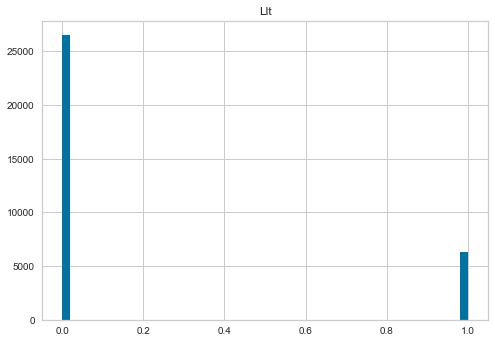

In [94]:
csv = pandas.read_csv(filename)
csv = csv.dropna(axis=0).reset_index(drop=True)#drop NaN
csv = csv[csv['Lmt']>0.1].reset_index(drop=True)
csv = csv[csv['Lmr']>0.1].reset_index(drop=True)

array_len = len(csv)

for i in range(0, array_len): 

    csv['I1'][i] = csv['I1'][i].replace('i', 'j')
    csv['I2'][i] = csv['I2'][i].replace('i', 'j')
    csv['I1'][i] = csv['I1'][i].replace(' ', '')
    csv['I2'][i] = csv['I2'][i].replace(' ', '')
    csv['I1'][i] = complex(csv['I1'][i]).real
    csv['I2'][i] = complex(csv['I2'][i]).real
    

csv['I1'] = pandas.to_numeric(csv['I1'], downcast="float")
csv['I2'] = pandas.to_numeric(csv['I2'], downcast="float")

R1 = np.zeros(array_len)
R2 = np.zeros(array_len)

for i in range(0, array_len): 
    R1[i] = csv['copperloss_tx'][i]/csv['I1'][i]/csv['I1'][i]
    R2[i] = csv['copperloss_rx'][i]/csv['I2'][i]/csv['I2'][i]

csv = csv.assign(R1 = R1)
csv = csv.assign(R2 = R2)

# Data post processing for classification

Lmt_th_up = 20
Lmt_th_low = 5
csv['Lmt'] = csv['Lmt'].apply(lambda x:1 if (x<Lmt_th_up) and (x>Lmt_th_low) else 0)
csv['Lmt'] = pandas.to_numeric(csv['Lmt'], downcast="float")

Lmr_th_up = 20
Lmr_th_low = 5
csv['Lmr'] = csv['Lmr'].apply(lambda x:1 if (x<Lmr_th_up) and (x>Lmr_th_low) else 0)
csv['Lmr'] = pandas.to_numeric(csv['Lmr'], downcast="float")

Llt_th_up = 25
Llt_th_low = 15
csv['Llt'] = csv['Llt'].apply(lambda x:1 if (x<Llt_th_up) and (x>Llt_th_low) else 0)
csv['Llt'] = pandas.to_numeric(csv['Llt'], downcast="float")

Llr_th_up = 20
Llr_th_low = 5
csv['Llr'] = csv['Llr'].apply(lambda x:1 if (x<Llr_th_up) and (x>Llr_th_low) else 0)
csv['Llr'] = pandas.to_numeric(csv['Llr'], downcast="float")

R1_th_up = 0.15
R1_th_low = 0.03
csv['R1'] = csv['R1'].apply(lambda x:1 if (x<R1_th_up) and (x>R1_th_low) else 0)
csv['R1'] = pandas.to_numeric(csv['R1'], downcast="float")

R2_th_up = 0.15
R2_th_low = 0.03
csv['R2'] = csv['R2'].apply(lambda x:1 if (x<R2_th_up) and (x>R2_th_low) else 0)
csv['R2'] = pandas.to_numeric(csv['R2'], downcast="float")

# N1,N2,d1,d2,freq,move_tx,move_rx,offset_tx,offset_rx,per,space1,space2,space3,space4,space5,space6,l1,l2,h1,w1,Lmt,Lmr,Llt,Llr,k,Lt,Lr,Lm,Rt,Rr,I1,I2,Zt,Zr,Zm,copperloss_tx,copperloss_rx


csv = csv.drop('Rt',axis=1)
csv = csv.drop('Rr',axis=1)
csv = csv.drop('Zt',axis=1)
csv = csv.drop('Zr',axis=1)
csv = csv.drop('Zm',axis=1)



data = csv


csv = csv.drop('Lmt',axis=1)
csv = csv.drop('Lmr',axis=1)
#csv = csv.drop('Llt',axis=1)
csv = csv.drop('Llr',axis=1)
csv = csv.drop('k',axis=1)
csv = csv.drop('Lt',axis=1)
csv = csv.drop('Lr',axis=1)
csv = csv.drop('Lm',axis=1)
csv = csv.drop('copperloss_tx',axis=1)
csv = csv.drop('copperloss_rx',axis=1)
csv = csv.drop('R1',axis=1)
csv = csv.drop('R2',axis=1)

dataset = csv
dataset = dataset.dropna(axis=0).reset_index(drop=True)



dataset.hist('Llt',bins=50)
#dataset.hist('I2',bins=50)

dataset

In [95]:
dataset

,N1,N2,d1,d2,freq,move_tx,move_rx,offset_tx,offset_rx,per,...,space4,space5,space6,l1,l2,h1,w1,Llt,I1,I2
0,10,16,1.29,1.03,40000,1.81,2.35,-3.5,-0.5,2347,...,19.84,2.86,2.96,10.1,58,29,27,0.0,0.660000,0.441787
1,10,16,1.50,1.13,40000,3.02,2.51,3.0,3.0,3666,...,21.12,2.94,2.92,18.6,55,37,86,1.0,0.249000,0.165429
2,10,16,0.74,1.74,40000,1.23,2.33,13.5,2.0,4392,...,9.67,4.29,2.68,19.7,44,42,44,1.0,0.237000,0.162938
3,10,16,1.05,1.66,40000,2.97,2.66,-4.0,-7.5,2686,...,29.94,4.38,3.94,19.2,49,61,69,0.0,0.156000,0.089700
4,6,8,0.73,1.75,40000,1.38,3.24,4.0,6.5,4008,...,12.29,4.23,3.68,12.4,47,54,28,0.0,0.497000,0.334730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32815,6,6,0.96,1.57,40000,1.95,1.90,0.0,-0.5,4324,...,28.73,3.53,3.66,18.8,44,17,94,1.0,0.694640,0.760000
32816,16,8,0.95,0.64,40000,2.43,2.10,2.5,14.0,2348,...,28.47,1.66,2.96,13.6,32,49,31,0.0,0.097773,0.218000
32817,16,8,1.65,1.93,40000,3.24,3.54,4.5,0.5,2832,...,29.01,5.13,5.47,14.0,36,58,84,0.0,0.085488,0.156000
32818,16,8,1.15,0.94,40000,1.74,1.41,1.0,6.0,4659,...,8.73,2.80,2.83,17.1,22,32,32,0.0,0.161859,0.326000


dataset

In [96]:
data = dataset.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)


print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (29538, 23)
Unseen Data For Predictions: (3282, 23)


In [97]:
from pycaret.classification import *
exp_reg101 = setup(data = data, target = 'Llt', session_id=123, silent=True, use_gpu=True) 

,Description,Value
0,session_id,123
1,Target,Llt
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(29538, 23)"
5,Missing Values,False
6,Numeric Features,19
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [98]:
# top3 = [ create_model(name) for name in ["xgboost","lightgbm", "rf"] ]
#top3 = compare_models(n_select = 3) 
lgbm = create_model('lightgbm',num_leaves=60,max_depth=20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8651,0.9248,0.5212,0.7061,0.5997,0.5208,0.5295
1,0.8777,0.9315,0.5711,0.7387,0.6442,0.5718,0.5787
2,0.8839,0.9253,0.6160,0.7417,0.6730,0.6032,0.6071
3,0.8680,0.9268,0.5362,0.7119,0.6117,0.5340,0.5418
4,0.8583,0.9187,0.5821,0.6518,0.6150,0.5285,0.5298
5,0.8680,0.9237,0.5970,0.6838,0.6375,0.5572,0.5591
6,0.8800,0.9304,0.5810,0.7444,0.6527,0.5815,0.5880
7,0.8694,0.9253,0.5736,0.6991,0.6301,0.5518,0.5557
8,0.8800,0.9298,0.5960,0.7354,0.6584,0.5866,0.5914
9,0.8771,0.9280,0.6135,0.7130,0.6595,0.5851,0.5875


In [99]:
#tuned = tune_model(lgbm)

In [100]:
#tuned_top3 = [tune_model(i) for i in top3]

In [101]:
#bagged_top3 = [ensemble_model(i) for i in tuned_top3]

In [102]:
#blender = blend_models(estimator_list = top3)

In [103]:
#best5 = automl(optimize = 'RMSE')

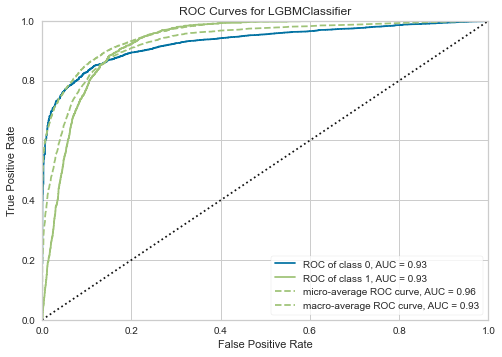

In [104]:
plot_model(lgbm)

In [105]:
plot_model(estimator = best5, plot = 'feature_all')

NameError: name 'best5' is not defined

In [ ]:
evaluate_model(lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [107]:
#save_model(lgbm, "ML_model2_v3_2021_08_12_v1_Llt_c")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Llt',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, device='gpu',
                                 importance_type='split', learning_rate=0.1,
                                 max_depth=20, min_chi